In [23]:
from pathlib import Path

import numpy as np
import pandas as pd


DATA_PATH = Path('/Volumes/Samsung_SSD/kaggle_dataset/lish-moa')

In [4]:
train_features = pd.read_csv(DATA_PATH / 'train_features.csv')
test_features = pd.read_csv(DATA_PATH / 'test_features.csv')
train_targets_scored = pd.read_csv(DATA_PATH / 'train_targets_scored.csv')
train_targets_nonscored = pd.read_csv(DATA_PATH / 'train_targets_nonscored.csv')
train_drug = pd.read_csv(DATA_PATH / 'train_drug.csv')

### A Glance at Features
- Features `g-` signify gene expression data.
- Features `c-` signify cell viability data.
- `cp_type` indicates samples treated with a compound (`cp_vehicle`) or with a control perturbation (`ctrl_vehicle`).
- Control perturbations have no MoAs;
- `cp_time` and `cp_dose` indicate treatment duration (24, 48, 72 hours) and dose (high or low).

In [5]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [7]:
test_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [8]:
test_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,...,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,48.030136,0.197471,-0.063233,0.137516,0.049622,0.052434,-0.147852,0.010424,-0.166886,-0.168069,...,-0.429980,-0.413215,-0.475762,-0.462484,-0.479196,-0.346450,-0.423905,-0.316387,-0.404859,-0.269792
std,19.414155,1.373476,0.800573,1.066475,0.949972,0.994018,1.204934,0.859452,1.088335,1.666240,...,2.013142,1.995433,1.963440,2.128477,2.149705,1.645669,2.086895,1.655524,1.790883,1.355936
min,24.000000,-5.321000,-4.142000,-6.996000,-3.765000,-6.312000,-8.717000,-6.037000,-8.833000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.502725,-0.552975,-0.431800,-0.465350,-0.445750,-0.576000,-0.521325,-0.477400,-0.526925,...,-0.527725,-0.521850,-0.539375,-0.540450,-0.548175,-0.561525,-0.497050,-0.521125,-0.531075,-0.541950
50%,48.000000,-0.060700,-0.027500,0.073400,-0.036450,-0.047800,-0.012500,-0.009200,0.002150,-0.002900,...,0.010050,0.010900,0.006550,0.017500,0.013450,-0.020000,0.043800,0.020450,0.030750,-0.006250
75%,72.000000,0.454650,0.429950,0.641125,0.423150,0.436050,0.498950,0.495975,0.422500,0.518050,...,0.478900,0.479625,0.442550,0.473300,0.487825,0.454400,0.501050,0.478925,0.487000,0.422800
max,72.000000,10.000000,4.536000,8.227000,10.000000,7.615000,6.356000,6.190000,2.995000,8.007000,...,4.936000,5.300000,3.268000,4.087000,5.290000,5.053000,5.276000,3.074000,3.859000,4.149000


### Check for Missing Values, Categorical Features

In [11]:
train_missing = train_features.isnull().sum().sum()
test_missing = test_features.isnull().sum().sum()

print(f'{train_missing} missing values in train, {test_missing} missing values in test are found.')

0 missing values in train, 0 missing values in test are found.


In [12]:
train_features.columns[train_features.dtypes == 'object']

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [13]:
test_features.columns[test_features.dtypes == 'object']

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

### Investigate Feature Distribution in Train and Test

#### Categorical Features: `cp_type`, `cp_dose`, `cp_time`

Plots in upper row are from training set, while plots in lower row are from testing set.

<AxesSubplot:xlabel='cp_time', ylabel='count'>

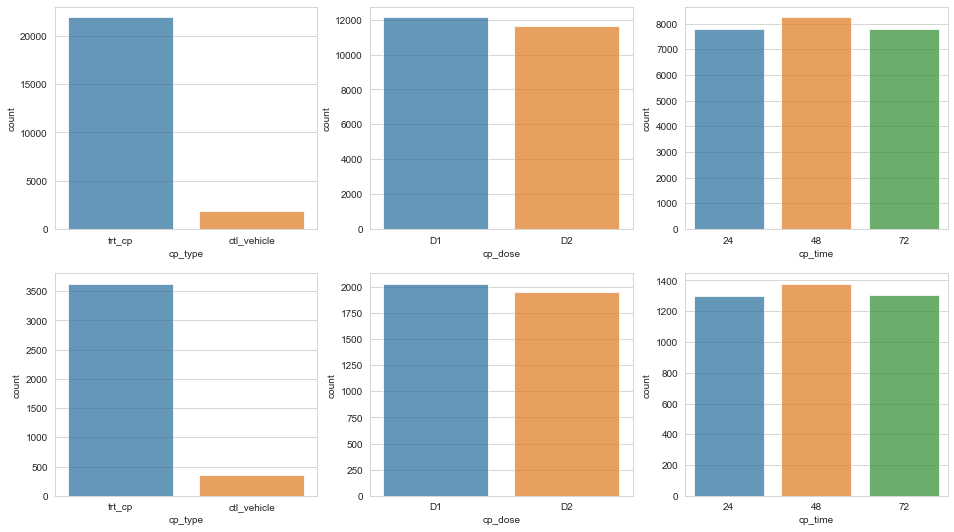

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Plots in upper row are from training features
fig = plt.figure(figsize=(16, 9))
ax1 = plt.subplot2grid((2, 3), (0, 0))
sns.countplot(x='cp_type', data=train_features, alpha=0.75)
ax2 = plt.subplot2grid((2, 3), (0, 1))
sns.countplot(x='cp_dose', data=train_features, alpha=0.75)
ax2 = plt.subplot2grid((2, 3), (0, 2))
sns.countplot(x='cp_time', data=train_features, alpha=0.75)

# Plots in lower row are from testing features
ax4 = plt.subplot2grid((2, 3), (1, 0))
sns.countplot(x='cp_type', data=test_features, alpha=0.75)
ax5 = plt.subplot2grid((2, 3), (1, 1))
sns.countplot(x='cp_dose', data=test_features, alpha=0.75)
ax6 = plt.subplot2grid((2, 3), (1, 2))
sns.countplot(x='cp_time', data=test_features, alpha=0.75)


By checking the categorical features distribution plots, we can say it's balanced between train and test sets.

#### Continuous features: `g-` and `c-`

In [22]:
all_feats = train_features.columns
gene_expression_feats = all_feats[all_feats.str.startswith('g-')]
cell_viability_feats = all_feats[all_feats.str.startswith('c-')]

print(f'{gene_expression_feats.shape=}, {cell_viability_feats.shape=}')

gene_expression_feats.shape=(772,), cell_viability_feats.shape=(100,)


##### Randomly choose `g-` and `c-` features to check their distribution.

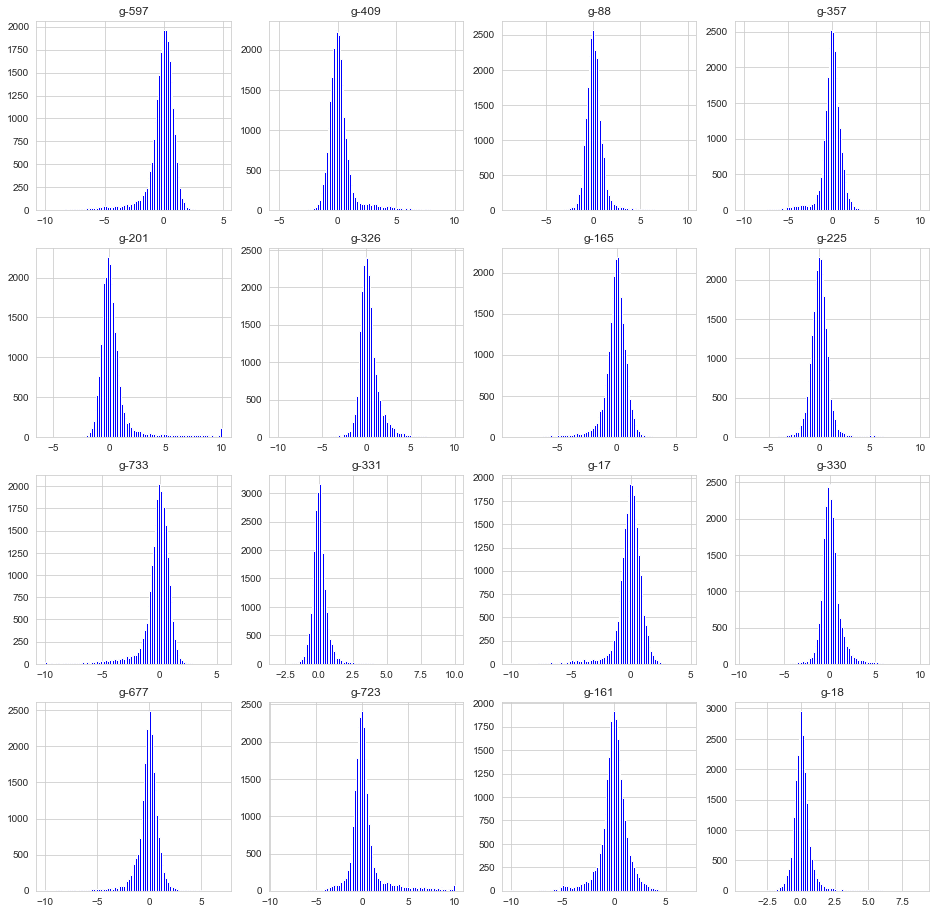

In [25]:
plt.figure(figsize=(16, 16))
sns.set_style('whitegrid')
gene_choice = np.random.choice(len(gene_expression_feats), 16)

for i, g_sel_idx in enumerate(gene_choice):
    plt.subplot(4, 4, i+1)
    plt.hist(train_features[gene_expression_feats[g_sel_idx]], bins=100, color='blue')
    plt.title(gene_expression_feats[g_sel_idx])


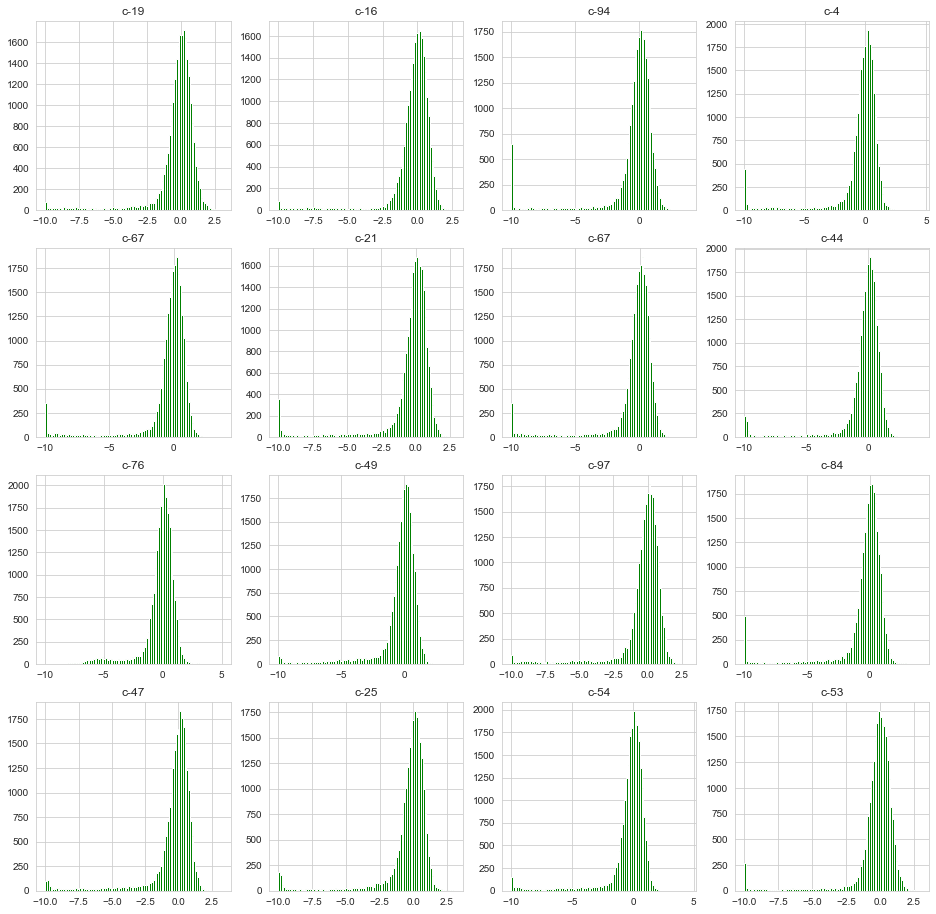

In [26]:
plt.figure(figsize=(16, 16))
sns.set_style('whitegrid')
cell_choice = np.random.choice(len(cell_viability_feats), 16)

for i, c_sel_idx in enumerate(cell_choice):
    plt.subplot(4, 4, i+1)
    plt.hist(train_features[cell_viability_feats[c_sel_idx]], bins=100, color='green')
    plt.title(cell_viability_feats[c_sel_idx])



##### Check the correlation within `g-` and `c-` features (in the treated samples without control)

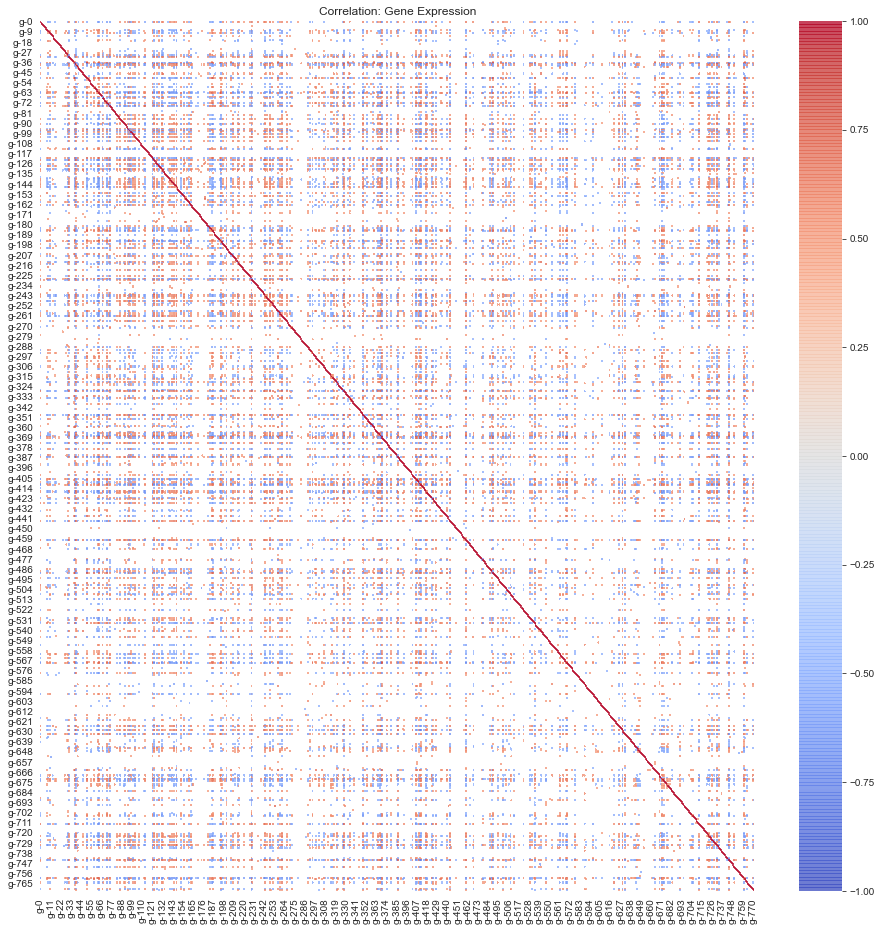

In [46]:
genes = train_features.query('cp_type == "trt_cp"')[gene_expression_feats]
plt.figure(figsize=(16, 16))
gene_corr = genes.corr()
filtered_corr_gene = gene_corr[gene_corr.abs() >= 0.5]
sns.heatmap(filtered_corr_gene, cmap='coolwarm', alpha=0.75, vmax=1, vmin=-1)
plt.title('Correlation: Gene Expression')
plt.show()

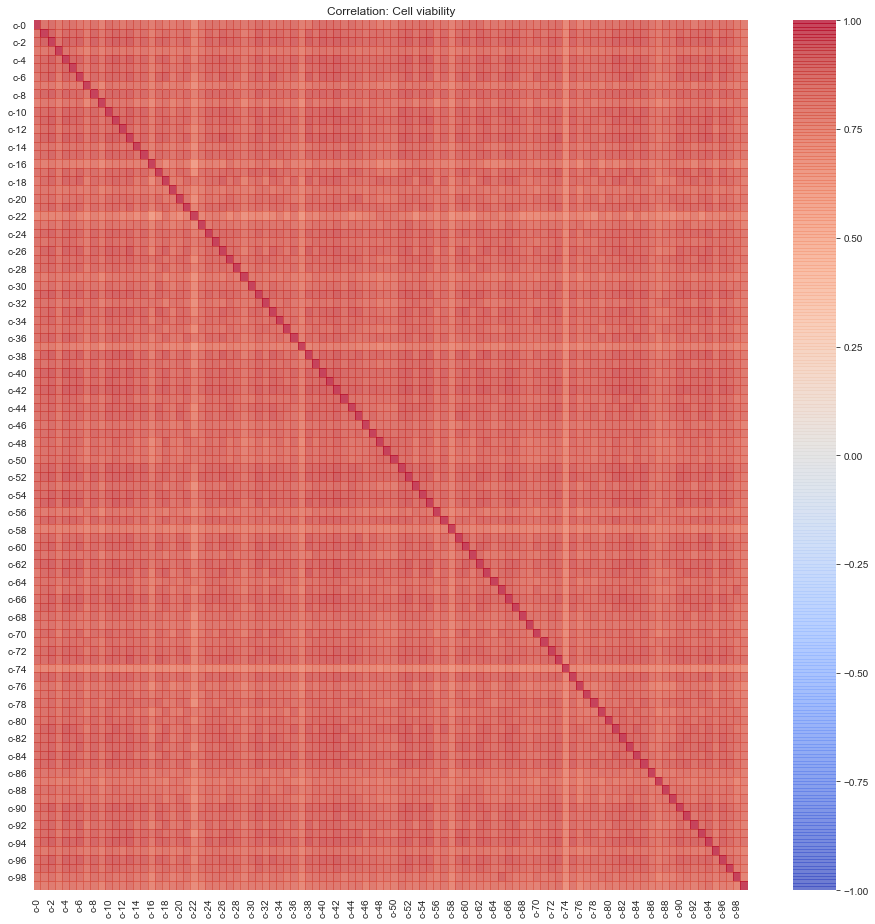

In [47]:
cells = train_features.query('cp_type == "trt_cp"')[cell_viability_feats]
plt.figure(figsize=(16, 16))
cell_corr = cells.corr()
filtered_corr_cell = cell_corr[cell_corr.abs() > 0.5]
sns.heatmap(filtered_corr_cell, cmap='coolwarm', alpha=0.75, vmax=1, vmin=-1)
plt.title('Correlation: Cell viability')
plt.show()

In [102]:
# Refactor 'corrs' function

def unstack_corr_df(corr, col_name_1, col_name_2):
    corr_uns = corr.unstack()
    corr_uns_sorted = corr_uns.sort_values(ascending=False)
    df_corr = corr_uns_sorted.to_frame()
    df_corr.reset_index(drop=False, inplace=True)
    df_corr = df_corr.query('level_0 != level_1')
    df_corr_cols = df_corr[['level_0', 'level_1']]
    dup_mask = ~df_corr_cols.apply(sorted, 1).astype(str).duplicated()
    df_corr = df_corr[dup_mask]
    df_corr.columns = [col_name_1, col_name_2, 'corr']
    
    return df_corr
    
    
gene_corr_ = unstack_corr_df(gene_corr, 'gene_1', 'gene_2')
cell_corr_ = unstack_corr_df(cell_corr, 'cell_1', 'cell_2')

print(f'{len(gene_corr_.query("corr.abs() >= 0.75"))}/{len(gene_corr_)} correlations >= 0.75 in gene features')
print(f'{len(cell_corr_.query("corr.abs() >= 0.75"))}/{len(cell_corr_)} correlations >= 0.75 in cell features')

281/297606 correlations >= 0.75 in gene features
4774/4950 correlations >= 0.75 in cell features


In [100]:
gene_corr_

,gene_1,gene_2,corr
772,g-37,g-50,0.912383
774,g-672,g-50,0.851694
776,g-37,g-489,0.850502
778,g-489,g-50,0.847806
780,g-460,g-349,0.845178
...,...,...,...
595974,g-63,g-349,-0.811955
595976,g-228,g-744,-0.815010
595978,g-228,g-460,-0.815484
595980,g-248,g-760,-0.822524


In [99]:
cell_corr_

,cell_1,cell_2,corr
100,c-52,c-42,0.927873
102,c-13,c-73,0.924338
104,c-13,c-26,0.924001
106,c-11,c-55,0.917963
108,c-6,c-33,0.917805
...,...,...,...
9990,c-74,c-37,0.671538
9992,c-74,c-22,0.668643
9994,c-74,c-58,0.664659
9996,c-37,c-22,0.656201


Most features are highly related to each other in cell viability features. A part of features are highly related to each other in gene expression features. Should consider those situations in feature engineering.

### Investigate Targets(MoA) Distribution

Target features are categorized into two groups; scored and non-scored target features, and features in both of those groups are binary. The competition score is based on the scored target features but non-scored group can still be used for model evaluation, data analysis and feature engineering.

We will filter the train_targets_scored dataset and keep just the treated rows (we discard the control rows because they are not treated with the drugs).

In [105]:
train_targets_scored

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
train_targets_nonscored

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Investigate the distribution of how many labels are given in each scored train targets

len(train_targets_scored)=23814


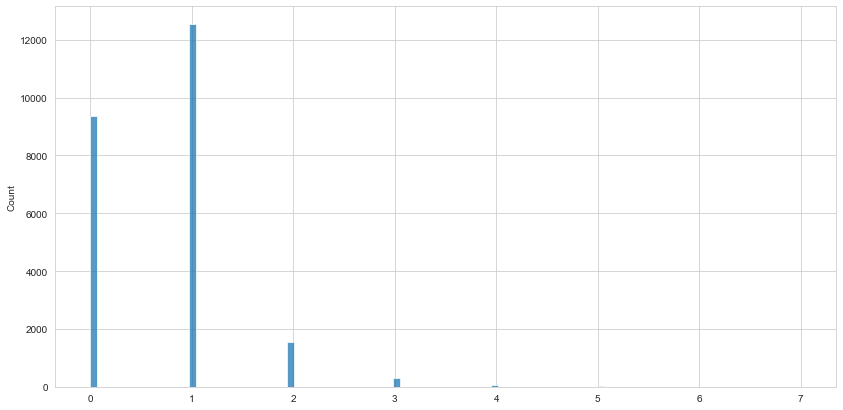

In [133]:
plt.figure(figsize=(14, 7))
sns.histplot(train_targets_scored.drop('sig_id', axis=1).sum(axis=1))
print(f'{len(train_targets_scored)=}')

#### Investigate the distribution of how frequently each label is given in scored train targets

len(train_targets_scored)=23814


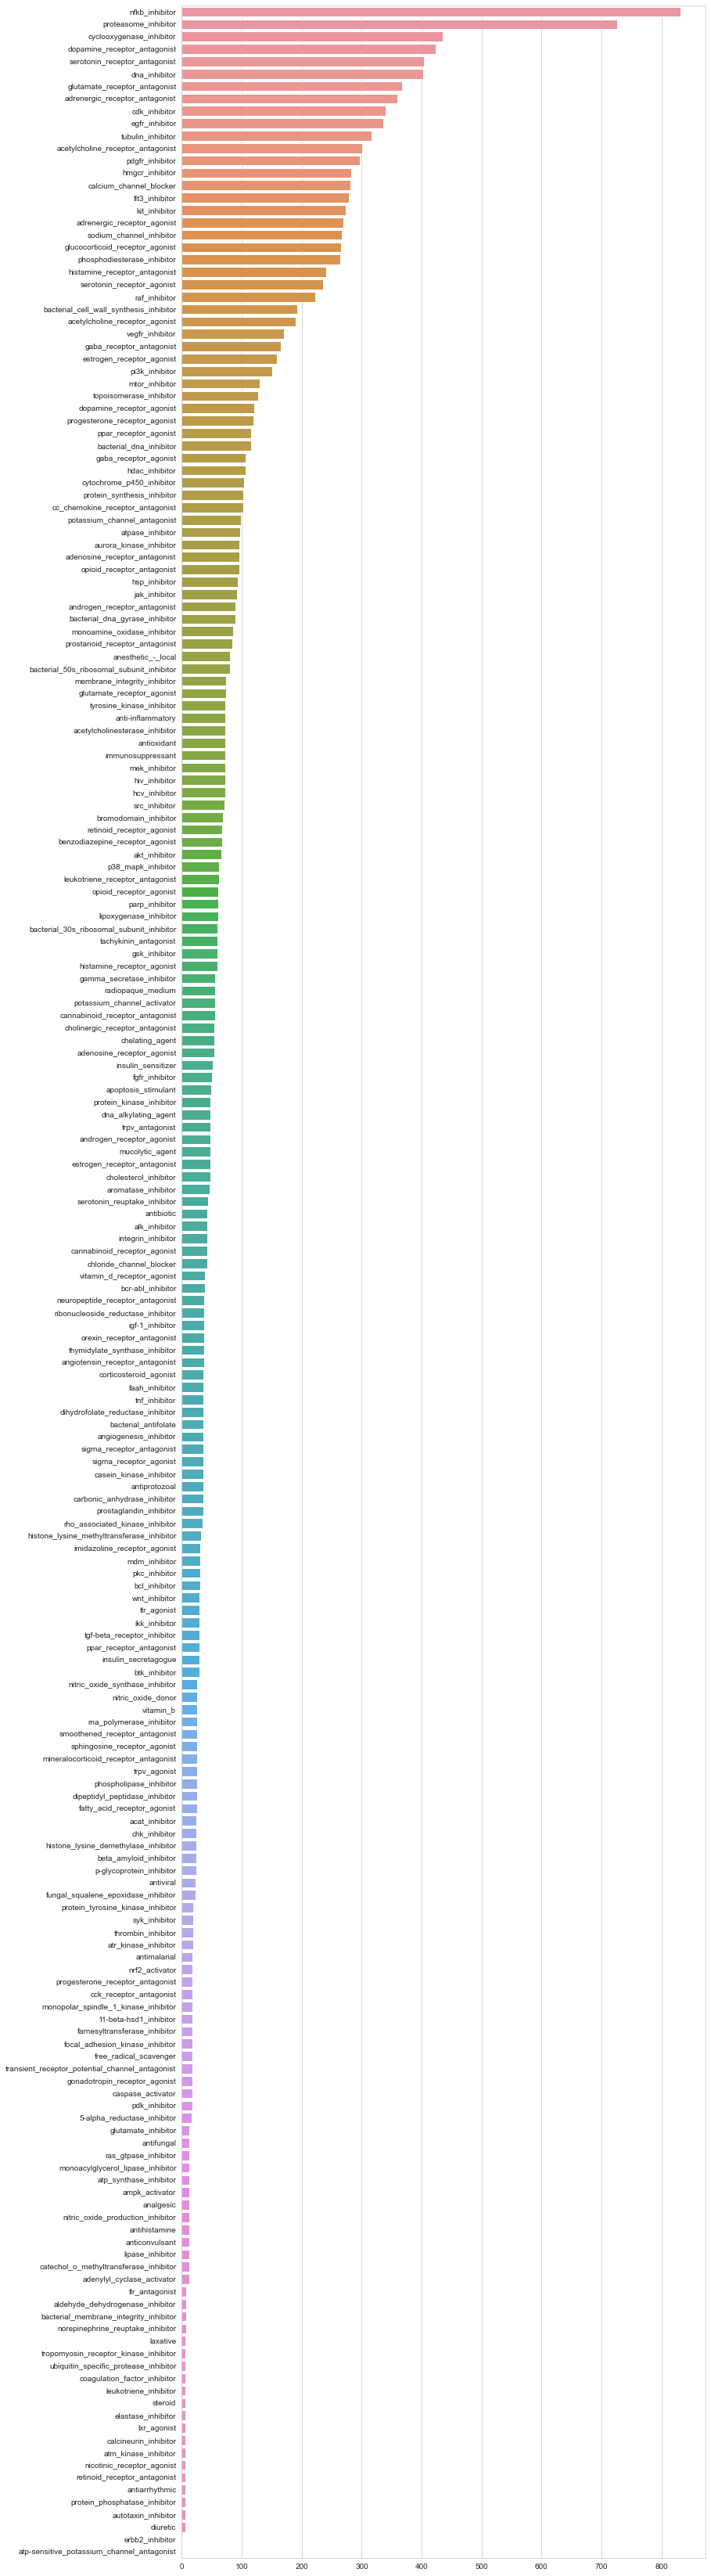

In [134]:
plt.figure(figsize=(12, 60))
freq_plot = train_targets_scored.drop('sig_id', axis=1).sum(axis=0).sort_values(ascending=False)
sns.barplot(x=freq_plot.values, y=freq_plot.index)
print(f'{len(train_targets_scored)=}')

The first 2 features `nfkb_inhibitor`, `proteasome_inhibitor` may be outliers as their appearance frequencies are much higher than those of other features.

#### Investigate the correlation within targets

<AxesSubplot:>

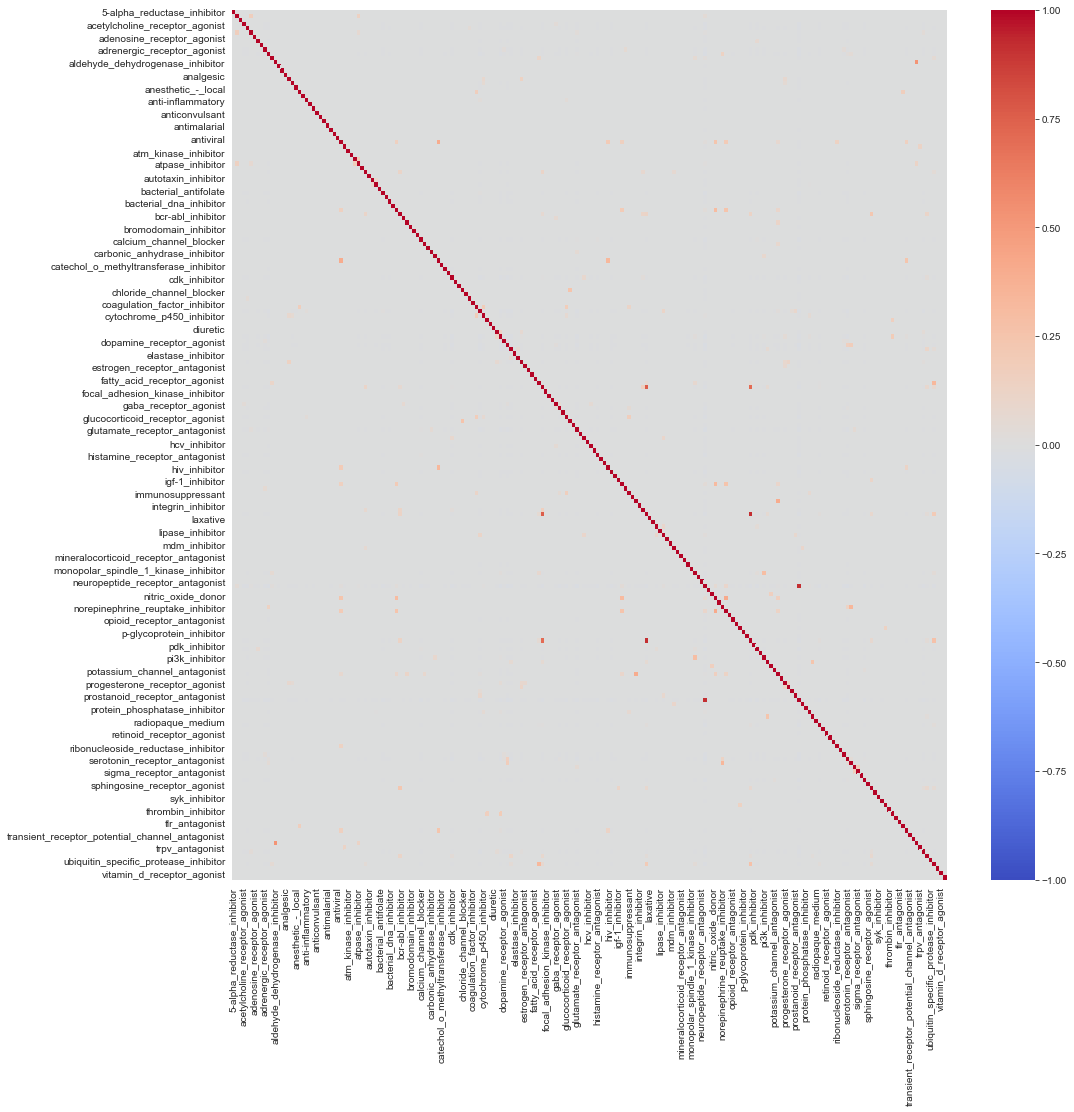

In [137]:
plt.figure(figsize=(16, 16))
target_corr = train_targets_scored.drop('sig_id', axis=1).corr()

target_corr_masked = target_corr[target_corr.abs() >= 0.5]
sns.heatmap(target_corr, cmap='coolwarm', vmax=1, vmin=-1)

In [138]:
target_corr_ = unstack_corr_df(target_corr, 'target_1', 'target_2')
print(f'{len(target_corr_.query("corr.abs() >= 0.75"))}/{len(target_corr_)} correlations >= 0.75 in targets')
target_corr_

3/21115 correlations >= 0.75 in targets


,target_1,target_2,corr
206,proteasome_inhibitor,nfkb_inhibitor,0.921340
208,kit_inhibitor,pdgfr_inhibitor,0.915603
210,flt3_inhibitor,kit_inhibitor,0.758112
212,flt3_inhibitor,pdgfr_inhibitor,0.705119
214,trpv_agonist,aldehyde_dehydrogenase_inhibitor,0.528950
...,...,...,...
42426,dopamine_receptor_antagonist,proteasome_inhibitor,-0.023875
42428,proteasome_inhibitor,cyclooxygenase_inhibitor,-0.024188
42430,dna_inhibitor,nfkb_inhibitor,-0.024932
42432,serotonin_receptor_antagonist,nfkb_inhibitor,-0.024995


Also, the correlation of features `nfkb_inhibitor` and `proteasome_inhibitor` is high. Those features are considered to be outliers.

`Kit_inhibtor` is highly correlated with 2 targets: `pdgfr_inhibitor` and `flt3_inhibitor`.

### Investigate Drug IDs

>`Train_drug.csv` contains anonymous drug ids of every signature id in training set. There are 3289 unique drugs while there are 23814 unique signatures. This means some drugs are used more than 6 times (2 different doses x 3 different durations). This data can be useful for cross-validations and outlier detection.


#### Most frequent drugs in the srug set

len(train_drug)=23814


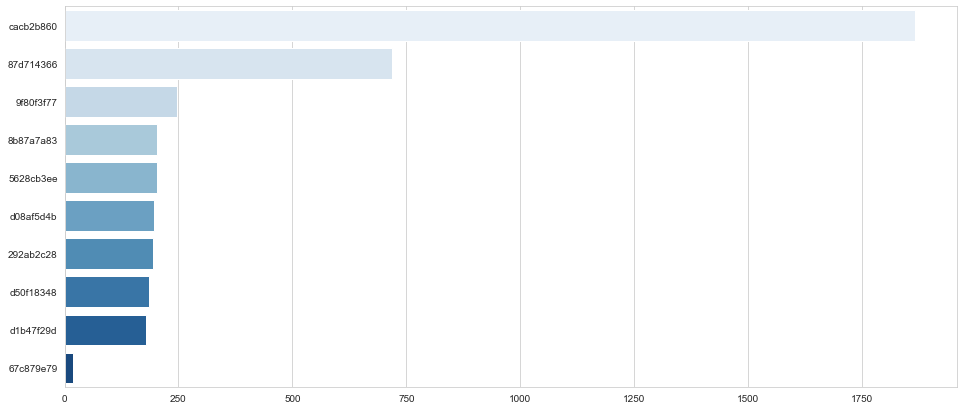

In [141]:
show_top_num = 10

fig = plt.figure(figsize=(16, 7))
sns.barplot(x=train_drug['drug_id'].value_counts().values[:show_top_num],
            y=train_drug['drug_id'].value_counts().index[:show_top_num], palette = "Blues")
print(f'{len(train_drug)=}')

In [143]:
print(f"Number of rows of the Control vehicle is {len(train_features[train_features['cp_type']=='ctl_vehicle'])}")
print(f"Number of rows of the Drug cacb2b860 is {train_drug.drug_id.value_counts()[0]}")

Number of rows of the Control vehicle is 1866
Number of rows of the Drug cacb2b860 is 1866


Then we could conclude that drug cacb2b860 is the control vehicle, with high presence.

In [150]:
drug_count = train_drug[['drug_id']].value_counts().to_frame()
drug_count.columns = ['drug_count']
drug_count2 = drug_count.value_counts().to_frame().reset_index()
drug_count2.columns = ['Samples per drug', 'Number of Drugs']
drug_count2[:show_top_num]

,Samples per drug,Number of Drugs
0,6,2774
1,7,196
2,1,129
3,5,66
4,12,64
5,13,25
6,14,6
7,11,4
8,8,4
9,18,3


Observations:

- 2774 drugs out of 3700 drugs have 6 rows that correspond to 2 doses and 3 treatment times.
- Only 64 drugs have 12 samples, I was expecting more drugs to be profiled twice.
- Only 3 drugs have 18 sample, the drugs were profiled 3 times.